# 771763 - Understanding Artificial Intelligence

## Assessment coding components 1 
***

# Component 1- Artificial Neural Network

In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Phytoplankton Results.csv')

In [5]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df[:828]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 1 to 828
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Sample number                                       828 non-null    object 
 1   Production area                                     827 non-null    object 
 2   Bed ID                                              827 non-null    object 
 3   Local authority                                     828 non-null    object 
 4   Grid reference

Note 1                              827 non-null    object 
 5   Sampling point                                      828 non-null    object 
 6   Date sample collected                               828 non-null    object 
 7   Alexandrium spp. 
cells L-1
(PSP)                   828 non-null    object 
 8   Dinophysiaceae 
cells L-1
(DSP)                     827 non-null    object 
 9  

In [7]:
df.isnull().sum()

0
Sample number                                             0
Production area                                           1
Bed ID                                                    1
Local authority                                           0
Grid reference\n\nNote 1                                  1
Sampling point                                            0
Date sample collected                                     0
Alexandrium spp. \ncells L-1\n(PSP)                       0
Dinophysiaceae \ncells L-1\n(DSP)                         1
Prorocentrum lima \ncells L-1\n(DSP)                      1
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                  1
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)          1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)       0
Prorocentrum cordatum \ncells L-1\n(Venerupin)            0
NaN                                                     828
NaN                                                     828
dtype: int64

In [8]:
def clean_data(col):
    df[col] = df[col].replace('ND', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col]= df[col].fillna(-1)


    return df[col]
    
cols = ['Alexandrium spp. \ncells L-1\n(PSP)', 'Dinophysiaceae \ncells L-1\n(DSP)', 'Prorocentrum lima \ncells L-1\n(DSP)', 'Pseudo-nitzschia spp. \ncells L-1\n(ASP) ']

In [9]:
for col in cols:
    clean_data(col)

In [10]:
df

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,1/4/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,1/4/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,1/5/2021,0.0,0.0,0.0,400.0,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,1/5/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,1/6/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,10/25/2021,0.0,40.0,0.0,7080.0,ND,ND,ND,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,10/26/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,10/25/2021,0.0,40.0,0.0,0.0,ND,ND,ND,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,10/27/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN


In [11]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}
#thresholds = [40, 100, 100, 150000]

In [12]:
def check_thresholds(df):
    t = []
    for i in range(0, 828):
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"] 
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]

        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1 
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
             threshold_reached = 1 

        t.append(threshold_reached)
       
    return t

link to check_thresholds code source can be found on page 4 [here][]

[here]:https://canvas.hull.ac.uk/courses/61140#:~:text=%5BLab%202%5D%20Neural%20networks.pdf

In [13]:
thresholds_reached = check_thresholds(df)

In [12]:
df['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(df, 'thresholds_cleaned.csv', sep=',', index=False)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [14]:
x =  pd.read_csv('thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
y = pd.read_csv('thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## 1st model architecture

In [16]:
# Initialize model
model = Sequential()
model.add(Dense(units=40, activation='relu', input_shape=(4,)))
model.add(Dropout(0.9))

model.add(Dense(units= 30, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units= 30, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units= 20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=13, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()
model.compile(loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                200       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                6

In [17]:
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 0.7069 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.8263 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8716 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8822 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_los

#### Visualizing the performance metrics of the model

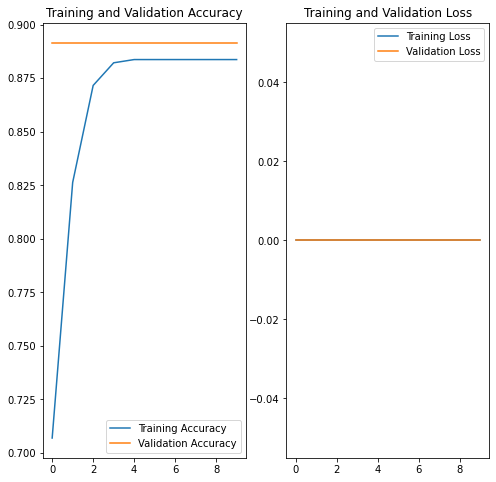

In [18]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs) 

# Define a function to plot the metrics of a model's performance
def plot_acc_loss():
    plt.figure(figsize=(8, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
#visualize model's performance metrics
plot_acc_loss()

## 2nd model architecture

In [19]:
model2 = Sequential()

model2.add(Dense(units= 20, activation='relu', input_shape=(4,)))
model2.add(Dropout(0.2))

model2.add(Dense(units=13, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1, activation='sigmoid'))


model2.summary()
model2.compile(loss='binary_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                100       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 13)                273       
                                                                 
 dropout_6 (Dropout)         (None, 13)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model2.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 0s 5ms/step - loss: 139.4603 - accuracy: 0.6903 - val_loss: 82.9639 - val_accuracy: 0.9157
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 136.7500 - accuracy: 0.7251 - val_loss: 140.2269 - val_accuracy: 0.9217
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 179.4603 - accuracy: 0.7205 - val_loss: 12.1605 - val_accuracy: 0.6627
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 150.3264 - accuracy: 0.6495 - val_loss: 67.1622 - val_accuracy: 0.9217
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 123.9218 - accuracy: 0.6964 - val_loss: 83.2610 - val_accuracy: 0.9157
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 209.7925 - accuracy: 0.7311 - val_loss: 55.9801 - val_accuracy: 0.9157
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 142.4229 - accuracy: 0.6692 - val_loss: 2.3137 - val_accuracy: 0.7892

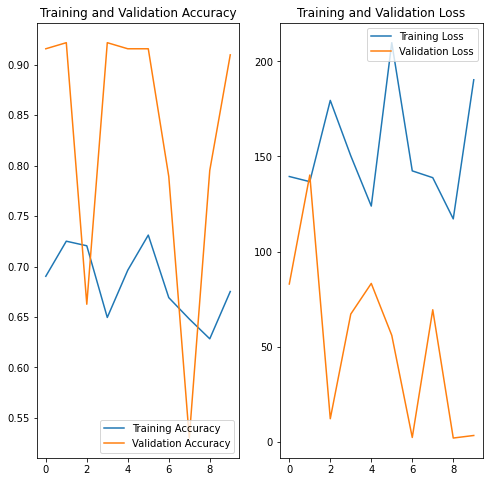

In [23]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

## 3rd model architecture

In [67]:
model3 = Sequential()
model3.add(Dense(units=45, activation='relu', input_shape=(4,)))
model3.add(Dropout(0.3))

model3.add(Dense(units= 20, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(units=13, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(units=1, activation='sigmoid'))


model3.summary()
model3.compile(loss='binary_crossentropy',
optimizer='Adam',
metrics=['accuracy'])


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 45)                225       
                                                                 
 dropout_46 (Dropout)        (None, 45)                0         
                                                                 
 dense_62 (Dense)            (None, 20)                920       
                                                                 
 dropout_47 (Dropout)        (None, 20)                0         
                                                                 
 dense_63 (Dense)            (None, 13)                273       
                                                                 
 dropout_48 (Dropout)        (None, 13)                0         
                                                                 
 dense_64 (Dense)            (None, 1)               

In [69]:
history = model3.fit(x_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(x_test, y_test)) 
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/40
42/42 [==============================] - 0s 5ms/step - loss: 120.4729 - accuracy: 0.7447 - val_loss: 21.0860 - val_accuracy: 0.5602
Epoch 2/40
42/42 [==============================] - 0s 3ms/step - loss: 114.9218 - accuracy: 0.7281 - val_loss: 14.3601 - val_accuracy: 0.5843
Epoch 3/40
42/42 [==============================] - 0s 3ms/step - loss: 124.9524 - accuracy: 0.7432 - val_loss: 15.1946 - val_accuracy: 0.5843
Epoch 4/40
42/42 [==============================] - 0s 4ms/step - loss: 82.7259 - accuracy: 0.7387 - val_loss: 7.7346 - val_accuracy: 0.6566
Epoch 5/40
42/42 [==============================] - 0s 3ms/step - loss: 68.5921 - accuracy: 0.7356 - val_loss: 2.1308 - val_accuracy: 0.7711
Epoch 6/40
42/42 [==============================] - 0s 4ms/step - loss: 75.9437 - accuracy: 0.7674 - val_loss: 11.5630 - val_accuracy: 0.6325
Epoch 7/40
42/42 [==============================] - 0s 4ms/step - loss: 54.0357 - accuracy: 0.7145 - val_loss: 10.3253 - val_accuracy: 0.6446
Epoch

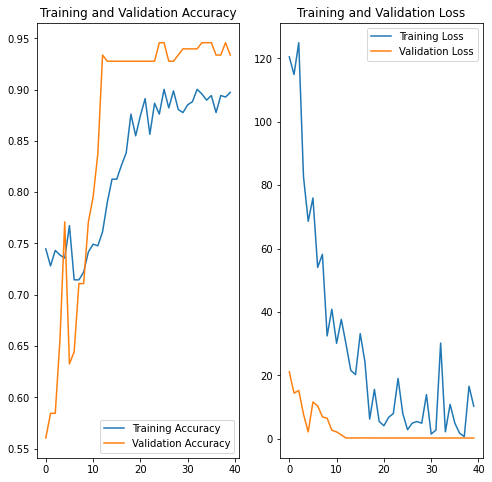

In [72]:
#visualize model's performance metrics
epochs = 40
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

## Model with RMSProp optimizer

In [29]:
model.compile(loss='categorical_crossentropy',
optimizer='RMSProp',
metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss: 0.0000e+00 - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8837 - val_loss

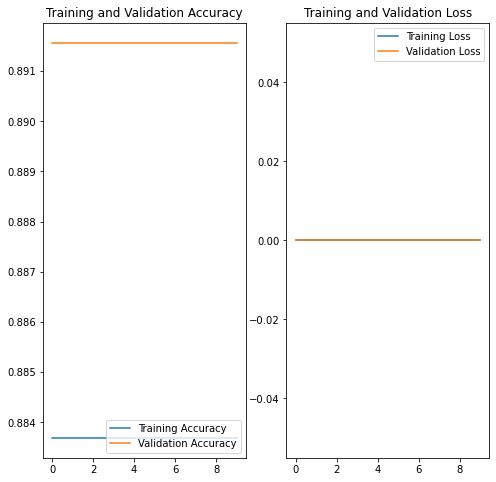

In [30]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

In [32]:
model2.compile(loss='binary_crossentropy',
optimizer='RMSProp',
metrics=['accuracy'])

history = model2.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 36.9678 - accuracy: 0.8006 - val_loss: 11.0503 - val_accuracy: 0.6566
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 65.2277 - accuracy: 0.7734 - val_loss: 8.3299 - val_accuracy: 0.6747
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 13.0349 - accuracy: 0.8263 - val_loss: 3.0778 - val_accuracy: 0.7831
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 12.6446 - accuracy: 0.8429 - val_loss: 1.8307 - val_accuracy: 0.9398
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 30.8239 - accuracy: 0.8248 - val_loss: 7.4394 - val_accuracy: 0.6807
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 8.4404 - accuracy: 0.8112 - val_loss: 2.2106 - val_accuracy: 0.8012
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 25.0019 - accuracy: 0.8172 - val_loss: 0.6498 - val_accuracy: 0.8554
Epoch 8/10
42

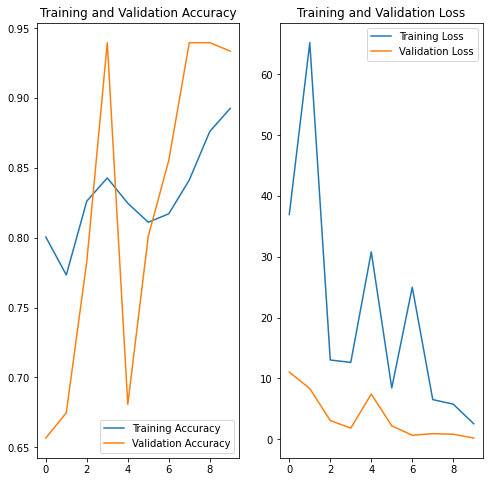

In [33]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plot_acc_loss()

In [74]:
model3.compile(loss='binary_crossentropy',
optimizer='RMSProp',
metrics=['accuracy'])

history = model3.fit(x_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(x_test, y_test)) 
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/40
42/42 [==============================] - 1s 14ms/step - loss: 13.8905 - accuracy: 0.9109 - val_loss: 0.1986 - val_accuracy: 0.9398
Epoch 2/40
42/42 [==============================] - 0s 3ms/step - loss: 0.8941 - accuracy: 0.9094 - val_loss: 0.2010 - val_accuracy: 0.9277
Epoch 3/40
42/42 [==============================] - 0s 3ms/step - loss: 1.4164 - accuracy: 0.9063 - val_loss: 0.1991 - val_accuracy: 0.9398
Epoch 4/40
42/42 [==============================] - 0s 4ms/step - loss: 2.7205 - accuracy: 0.9094 - val_loss: 0.1978 - val_accuracy: 0.9458
Epoch 5/40
42/42 [==============================] - 0s 3ms/step - loss: 4.3817 - accuracy: 0.9184 - val_loss: 0.2001 - val_accuracy: 0.9398
Epoch 6/40
42/42 [==============================] - 0s 3ms/step - loss: 5.7230 - accuracy: 0.9109 - val_loss: 0.2013 - val_accuracy: 0.9398
Epoch 7/40
42/42 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.9018 - val_loss: 0.1999 - val_accuracy: 0.9398
Epoch 8/40
42/42 [

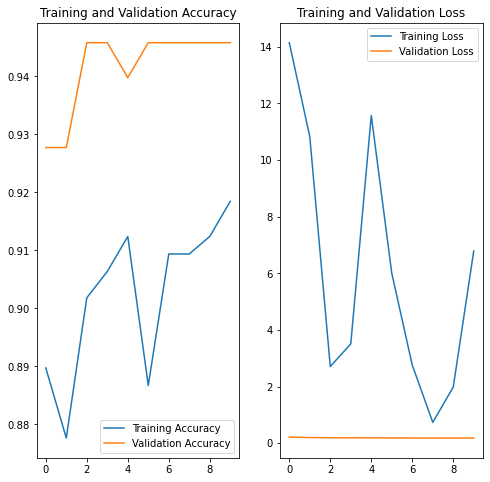

In [35]:
#visualize model's performance metrics
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plot_acc_loss()


checking my model's performance against the majority baseline 

In [ ]:
predictions = np.zeros(len(x_test))

new_score = model.evaluate(x_test, predictions, verbose=0)
print('Test loss:', new_score[0])
print('Test accuracy:', new_score[1])


 model.predict(
    x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

## The effects of data size
### Data  Augmentation
>I will correct the imbalance in my dataset by combining of oversampling and undersampling methods that have proven effective and together may be considered resampling techniques.
combination of SMOTE oversampling and Tomek Links undersampling

In [73]:
print("Before ReSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1))) 
print("Before ReSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0))) 

Before ReSampling, counts of label '1': 95
Before ReSampling, counts of label '0': 733 



In [83]:
from collections import Counter 
from sklearn.svm import LinearSVC 
from imblearn.pipeline import make_pipeline 
import imblearn 
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks 

In [84]:
# define resampling
smt = SMOTETomek()
X_train_res, y_train_res = smt.fit_resample(x, y["thresholds_reached"])

In [85]:
print('After ReSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After ReSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After ReSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After ReSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After ReSampling, the shape of train_X: (1450, 4)
After ReSampling, the shape of train_y: (1450,) 

After ReSampling, counts of label '1': 725
After ReSampling, counts of label '0': 725


In [86]:
'''training the model again with the resampled data and validating with the original test data 
model's parameters remain the same'''
history= model.fit(X_train_res, y_train_res, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
# evaluating the model's performance
score= model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
91/91 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.6897 - val_loss: 0.5034 - val_accuracy: 0.9398
Epoch 2/10
91/91 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.6966 - val_loss: 0.4968 - val_accuracy: 0.9398
Epoch 3/10
91/91 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7145 - val_loss: 0.4854 - val_accuracy: 0.9337
Epoch 4/10
91/91 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.7103 - val_loss: 0.4795 - val_accuracy: 0.9518
Epoch 5/10
91/91 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7103 - val_loss: 0.4761 - val_accuracy: 0.9398
Epoch 6/10
91/91 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7234 - val_loss: 0.4676 - val_accuracy: 0.9458
Epoch 7/10
91/91 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7400 - val_loss: 0.4607 - val_accuracy: 0.9458
Epoch 8/10
91/91 [==

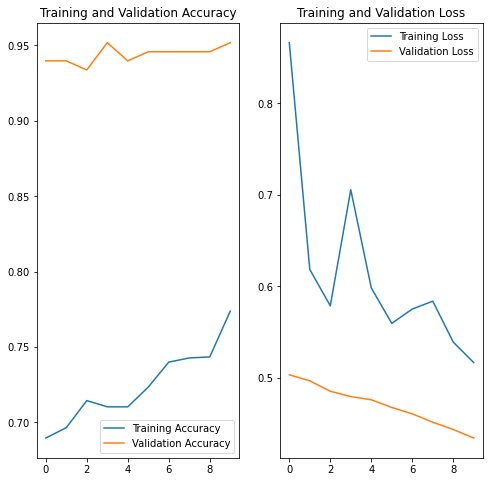

In [87]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
#visualize model's performance metrics
plot_acc_loss()

### Adding other columns of numeric values

In [13]:
df.columns

Index([                                       'Sample number',
                                            'Production area',
                                                     'Bed ID',
                                            'Local authority',
                      'Grid reference\n\nNote 1             ',
                                             'Sampling point',
                                      'Date sample collected',
                        'Alexandrium spp. \ncells L-1\n(PSP)',
                          'Dinophysiaceae \ncells L-1\n(DSP)',
                       'Prorocentrum lima \ncells L-1\n(DSP)',
                  'Pseudo-nitzschia spp. \ncells L-1\n(ASP) ',
           'Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)',
       'Protoceratium reticulatum \ncells L-1\n(Yessotoxin) ',
            'Prorocentrum cordatum \ncells L-1\n(Venerupin) ',
                                                          nan,
                                                       

In [14]:
usecols=['Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)', 'Protoceratium reticulatum \ncells L-1\n(Yessotoxin) ', 'Prorocentrum cordatum \ncells L-1\n(Venerupin) ']
for col in usecols:
    clean_data(col)

0                                                   Alexandrium spp. \ncells L-1\n(PSP)  \
0                                                                                         
Alexandrium spp. \ncells L-1\n(PSP)                                            1.000000   
Dinophysiaceae \ncells L-1\n(DSP)                                              0.055174   
Prorocentrum lima \ncells L-1\n(DSP)                                          -0.008287   
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                                       0.019008   
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)                              -0.007551   
Protoceratium reticulatum \ncells L-1\n(Yessoto...                            -0.007628   
Prorocentrum cordatum \ncells L-1\n(Venerupin)                                -0.006579   
NaN                                                                                 NaN   
NaN                                                                                 NaN   

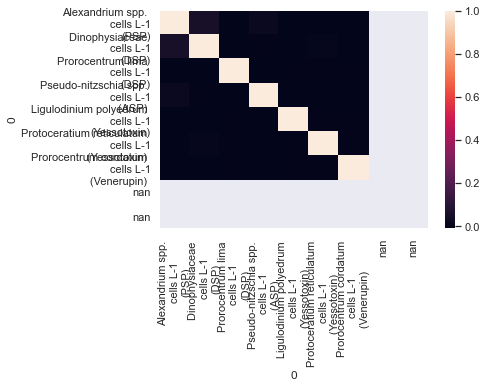

In [15]:
import numpy as np; np.random.seed(0) 
import seaborn as sns; sns.set_theme() 
corrMatrix = df.corr() 
print (corrMatrix) 
ax = sns.heatmap(corrMatrix)

### Visualizing the dataset

In [16]:
new_df=pd.read_csv('thresholds_cleaned.csv', usecols= ["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)", "thresholds_reached"], na_values = ['no info', '.'])
new_df

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),thresholds_reached
0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,400.0,0
3,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...
823,0.0,40.0,0.0,7080.0,0
824,0.0,0.0,0.0,0.0,0
825,0.0,40.0,0.0,0.0,0
826,0.0,0.0,0.0,0.0,0


<Figure size 720x720 with 0 Axes>

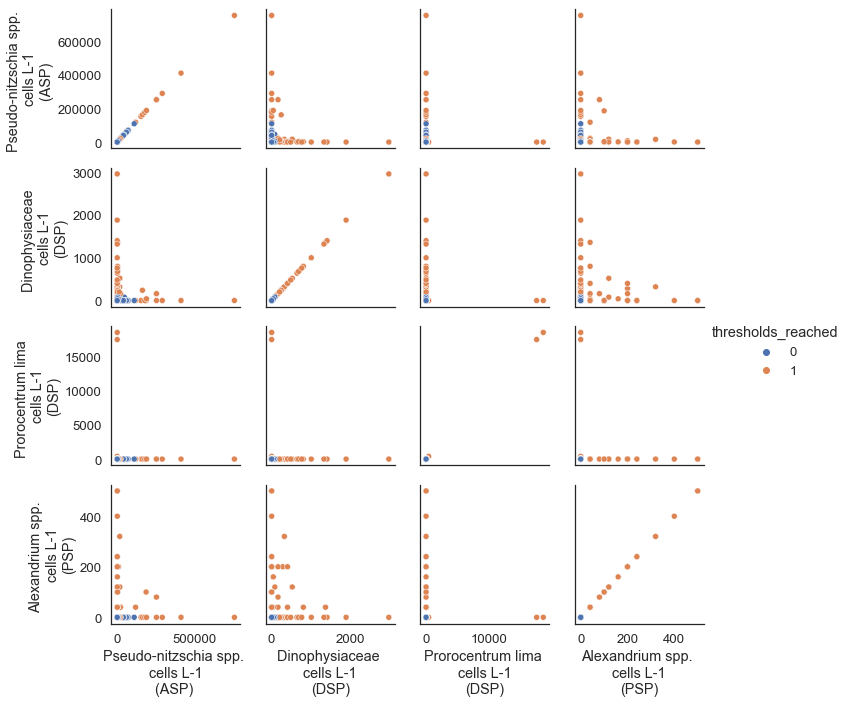

In [31]:
#data = pd.melt(new_df, 'thresholds_reached', var_name='Phytoplankton',  value_name='Concentration')
#set fig size
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
g = sns.PairGrid(new_df, vars=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], hue="thresholds_reached")
g.map(sns.scatterplot)
g.add_legend()
plt.savefig('water_quality.png')

In [ ]:
data = pd.melt(new_df, 'thresholds_reached', var_name='Phytoplankton',  value_name='Concentration')
#set fig size
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax =sns.scatterplot(x='Phytoplankton', y='Concentration', hue='thresholds_reached', data=data)